<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_11_%EC%9D%BC_%EB%B3%B5%EC%8A%B5(Text_Rank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

mat = np.array([[0,0.2,0,0.3],
                [0.2,0,0.4,0],
                [0,0.4,0,0],
                [0.3,0,0,0]])

In [6]:
# 인접 노드들을 리스트로 표현

output_node = []
for row in mat:
  tmp = []
  for i in range(len(row)):
    if row[i] > 0:
      tmp.append(i)
  output_node.append(tmp)

output_node
#mat

[[1, 3], [0, 2], [1], [0]]

In [7]:
# Text Rank 초깃값 설정
initial_tr = 1/len(mat)
initial_tr

0.25

In [9]:
TR = [initial_tr]*len(mat)
TR

[0.25, 0.25, 0.25, 0.25]

In [16]:
# D값 설정

d = 0.85

# while문을 탈출하기위한 boolean 변수
stop = False
# Error 값을 저장하기 위한 변수
history = []
step = 0
while stop==False:
  # A,B,C,D 를 업데이트 할 때 원래값과 수정된 값의 차이의 합
  total_error = 0
  # A,B,C,D를 순회하면서
  for node in range(len(mat)):
    # 초항 1-d 
    update_val = (1-d)/4
    tmp = 0
    # A 노드와 연결된 노드 중에서 (B,D)
    for i in output_node[node]:
      s = 0
      # B에 연결된 노드의 가중치 합을 S에 저장
      for j in output_node[i]:
        s+= mat[i][j]
      # TR['B']*mat[A->B]/sigma(B)
      k = TR[i]*(mat[node][i]/s)
      tmp += k
    # update_val은 기존의 1-d + d*(tmp), d: 0.85
    update_val += tmp*d
    # error는 기존의 값과 update_val과의 차이
    error = abs(TR[node]-update_val)
    # totalerror에 error를 더해준다.
    total_error+=error
    # 만약 error가 e^-20보다 작다면 early stop flag 
    if error < 1e-10:
      stop = True
    # A 노드를 업데이트 
    TR[node] = update_val
  history.append(total_error)
  step+=1
  print("step:",step, " error:",total_error)
  if stop ==True:
    break

TR

step: 1  error: 0.631049999679371
step: 2  error: 0.6457658247683454
step: 3  error: 0.4748260641951296
step: 4  error: 0.34544904530718146
step: 5  error: 0.2502768400591099
step: 6  error: 0.18102439943703713
step: 7  error: 0.13084775013412073
step: 8  error: 0.09455415209721138
step: 9  error: 0.06832018749894944
step: 10  error: 0.04936272631190944
step: 11  error: 0.035664971714247096
step: 12  error: 0.0257680582282184
step: 13  error: 0.018617455641478736
step: 14  error: 0.013451121403158156
step: 15  error: 0.009718438017714742
step: 16  error: 0.0070215722781352685
step: 17  error: 0.005073086205140104
step: 18  error: 0.0036653048508938635
step: 19  error: 0.0026481827743302933
step: 20  error: 0.001913312060106448
step: 21  error: 0.0013823679650603882
step: 22  error: 0.00099876085522832
step: 23  error: 0.0007216047180389207
step: 24  error: 0.0005213594088225859
step: 25  error: 0.00037668217288588934
step: 26  error: 0.0002721528699131115
step: 27  error: 0.00019663044

[0.28187998161882644,
 0.3187412099431861,
 0.21812001896780547,
 0.1812587906256015]

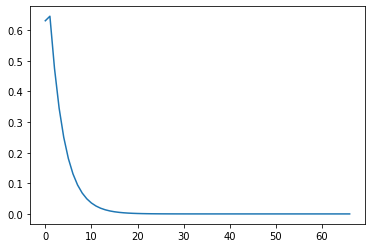

In [17]:
## error 값을 Graph로 출력
import matplotlib.pyplot as plt
plt.plot(history)